In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon, mannwhitneyu

In [2]:
cutoff = 2
#order = ['Memory B cell',  'CD8 effector','NK','Naive B cell','Naive CD8','CD8 central memory','Plasma','Mono', 'CD8 effector memory', 'Tregs','Naive CD4',
        #'CD4 effector memory','CD4 central memory']
file = '/Users/irffanalahi/Research/Research_update/Results_together/Bilge_parallel/summarize_result/MAHORLINEAGE_SM/deconresult_gt/EM_majorlineageSM_batch2.txt_ALL_melanoma_cfDNA_gt.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

values = ['NDB','DCB']

order=df.columns.tolist()
order.remove('Toxicity')
#order.remove('Total')
order.remove('Response')

In [3]:
df = (df[df['Response'].notna()]).copy()

In [4]:

df['Toxic'] = df['Response']
df

,Mono,Bcell,CD4,CD8,NK,Response,Toxicity,Toxic
Mixture,,,,,,,,
YUBLIT-11-2164-auto,47.249560,13.315469,14.696087,10.522319,14.216564,DCB,2.0,DCB
YUBRET-15-3411-auto,43.334562,15.386760,12.320849,11.801398,17.156431,DCB,2.0,DCB
YUBUMP-14-3166-auto,42.856376,12.907822,15.502103,12.187656,16.546044,NDB,0.0,NDB
YUCEVO-20-4119-auto,38.510852,13.913024,19.045583,11.466375,17.064166,DCB,1.0,DCB
YUCONFE-14-3261-auto,53.507748,11.066755,11.236909,9.120631,15.067957,DCB,NaN,DCB
YUCOT-09-970-auto,37.513611,11.948320,18.742322,15.754485,16.041262,DCB,0.0,DCB
YUCUSK-11-2018-auto,39.961584,13.441479,15.701804,14.735205,16.159927,NDB,2.0,NDB
YUDEBIT-12-2757-auto,44.943526,14.805474,12.439634,11.213963,16.597403,NDB,1.0,NDB
YUDIGIT-11-2144-auto,55.063342,10.495165,11.651760,10.205884,12.583849,NDB,1.0,NDB


In [5]:
p_vals = {}
for cell in order:
    p_val_list = []
    if cell not in ['Toxicity', 'Toxic']:
        multi = 1
        for i, toxicity in enumerate(values):
            y = np.array(df[df['Toxic'] == toxicity][cell])
            p_val_list.append(y)
        if np.mean(p_val_list[0]) >= np.mean(p_val_list[1]):
            multi = -1
        p_vals[cell] = -np.log10(mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]) * multi
        
p_vals

{'Mono': -0.04618236267205339,
 'Bcell': 0.014891051723389014,
 'CD4': 0.014891051723389014,
 'CD8': -0.1924313283478787,
 'NK': -0.15260731079494622}

In [6]:
type(p_vals)
p_vals={k: v for k, v in sorted(p_vals.items(), key=lambda item: item[1])}
print(p_vals)
order=p_vals.keys()
print(order)

{'CD8': -0.1924313283478787, 'NK': -0.15260731079494622, 'Mono': -0.04618236267205339, 'Bcell': 0.014891051723389014, 'CD4': 0.014891051723389014}
dict_keys(['CD8', 'NK', 'Mono', 'Bcell', 'CD4'])


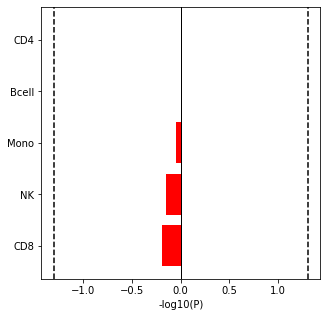

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for cell in order:
    y = p_vals[cell]
    if y <= 0:
        ax.barh(cell, y, color='r')
    else:
        ax.barh(cell, y, color='b')
        
ax.axvline(linewidth=1, color='k')
ax.axvline(x=-np.log10(0.05), linewidth=1.5, color='k', ls='--')
ax.axvline(x=np.log10(0.05), linewidth=1.5, color='k', ls='--')

#ax.annotate('P < 0.05', (0.85, 10), fontsize=12)
#ax.annotate('P < 0.05', (-1, 10), fontsize=12)
ax.set_xlabel('-log10(P)')
plt.savefig(file+'_response_barplot_mean.pdf', bbox_inches='tight')